In [1]:
import numpy as np
import h5py
import glob, os, re, sys

import pickle
import random
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import pop_playlists

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import rc
plt.style.use('bmh')
cmap = mpl.colormaps['viridis']
rc('font',**{'family':'DejaVu Sans','sans-serif':['Helvetica']})

In [2]:
DEFAULT_OUTPUT_DIR = "./data-output/"

# single-letter queries

In [12]:
qs = [
    "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k",
    "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w",
    "x", "y", "z"
]    

In [13]:
filenames = [DEFAULT_OUTPUT_DIR + "/artist_offset_dict_artist:" + q + ".pkl" for q in qs]

In [14]:
artist_offset_dicts = []
for filename in filenames:
    with open(filename, "rb") as f:
        artist_offset_dicts.append(pickle.load(f))

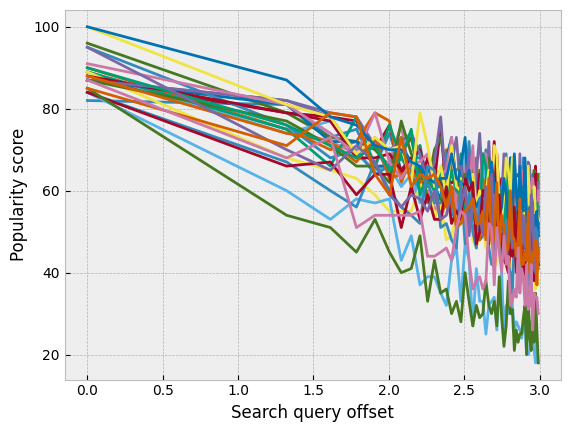

In [15]:
for artist_offset_dict in artist_offset_dicts:
    plt.plot(np.log10(np.array(artist_offset_dict['offsets'])+1), artist_offset_dict['artist_pop'])
plt.xlabel('Search query offset')
plt.ylabel('Popularity score')
plt.show()

# start with a single letter

In [16]:
qs = [
    "a%", "b%", "c%", "d%", "e%", "f%", "g%", "h%", "i%", "j%", "k%",
    "l%", "m%", "n%", "o%", "p%", "q%", "r%", "s%", "t%", "u%", "v%", "w%",
    "x%", "y%", "z%"
]

In [17]:
filenames = [DEFAULT_OUTPUT_DIR + "/artist_offset_dict_artist:" + q + ".pkl" for q in qs]

In [18]:
artist_offset_dicts = []
for filename in filenames:
    with open(filename, "rb") as f:
        artist_offset_dicts.append(pickle.load(f))

/tmp/ipykernel_413512/1372426006.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(artist_offset_dict['offsets']), artist_offset_dict['artist_pop'])


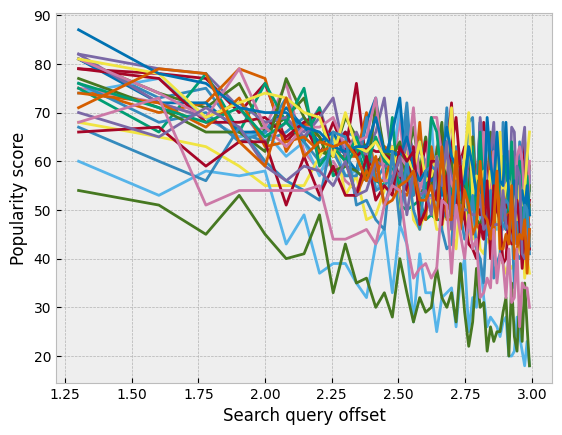

In [19]:
for artist_offset_dict in artist_offset_dicts:
    plt.plot(np.log10(artist_offset_dict['offsets']), artist_offset_dict['artist_pop'])
plt.xlabel('Search query offset')
plt.ylabel('Popularity score')
plt.show()

# What about double-letters? Should lead to fewer search results

In [20]:
filenames = glob.glob(os.path.join(DEFAULT_OUTPUT_DIR, "*%*%*"))
print(len(filenames))

169


In [21]:
artist_offset_dicts = []
for filename in filenames:
    with open(filename, "rb") as f:
        artist_offset_dicts.append(pickle.load(f))

/tmp/ipykernel_413512/1372426006.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(artist_offset_dict['offsets']), artist_offset_dict['artist_pop'])


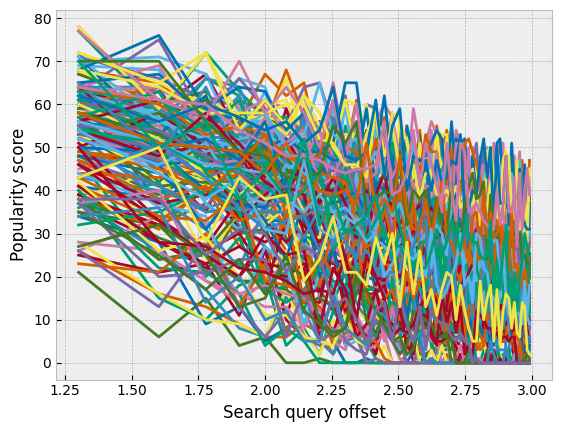

In [22]:
for artist_offset_dict in artist_offset_dicts:
    plt.plot(np.log10(artist_offset_dict['offsets']), artist_offset_dict['artist_pop'])
plt.xlabel('Search query offset')
plt.ylabel('Popularity score')
plt.show()

In [54]:
# what's one of these zero popularity artists?
for artist_offset_dict in artist_offset_dicts:
    if 0 in artist_offset_dict['artist_pop']:
        where_zero = np.where(np.array(artist_offset_dict['artist_pop'])==1)[0]
        if(len(where_zero) > 0):
            names_zero = np.array(artist_offset_dict['artist_names'])[where_zero]
            print(names_zero)

['Huang Guan-Qiang' 'Qari Junior Harith']
['Junclassic & Monsta X']
['Xavier Ingram']
['Q-Beatz']
['Q.K']
['Hea2xVlien']
['Grupo Xtasys' 'Gordon3x']
['Álvaro Quisbert']
["Harry Engleman's Quintet"]
['Kimberlee Ann Zegarelli']
['Maikal X' 'Maykel Xtremo']
['Saffire - The Australian Guitar Quartet' 'Paul Gonsalves Quartet'
 'Gianni Quintiliani' 'Quini Gómez']
['Il Quartettone' 'Il Quinto' 'Inxa Impro Quartet']
['BTS JAY3X' 'J2X' 'Take Over X John Paul Ivan']
['Forró 3x4' 'Flow X' 'F.O.X']
['Lil Rass X Skengdo X AM' 'AB3L X' 'AB3L X' '_X!LL_' 'LiL Xantos']
['cw 7x7']
['Zé Ernesto & Fernando' 'Zoltan Fecso' 'Zeke_fml']
['Baby Blitz Babyjay4x']
['Luis Quezada']
['Ivan Zorzolo' 'Atrakcyjny Kazimierz I Zespół Wiśnie']
['Hasan Ziafati']
